In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "file"):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    fileName = picName + "_error.pdf"
    fig_1.tight_layout() # This minimises whitespace around the axes.
    fig_1.savefig(fileName) # Save figure to current directory in PDF format
    fileName = picName + "_acc.pdf"
    fig_2.tight_layout() # This minimises whitespace around the axes.
    fig_2.savefig(fileName) # Save figure to current directory in PDF format
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)
batch_size = 50
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

['inputs', 'targets']
['inputs', 'targets']


# 1 layer CNN

HBox(children=(IntProgress(value=0, max=30), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 1: 256.8s to complete
    error(train)=1.19e+00, acc(train)=6.70e-01, error(valid)=1.20e+00, acc(valid)=6.65e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 2: 259.6s to complete
    error(train)=8.76e-01, acc(train)=7.46e-01, error(valid)=8.95e-01, acc(valid)=7.39e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 3: 258.7s to complete
    error(train)=7.40e-01, acc(train)=7.81e-01, error(valid)=7.66e-01, acc(valid)=7.76e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 4: 258.9s to complete
    error(train)=7.01e-01, acc(train)=7.89e-01, error(valid)=7.34e-01, acc(valid)=7.77e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 5: 257.9s to complete
    error(train)=6.37e-01, acc(train)=8.05e-01, error(valid)=6.83e-01, acc(valid)=7.92e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 6: 259.0s to complete
    error(train)=5.98e-01, acc(train)=8.14e-01, error(valid)=6.50e-01, acc(valid)=7.98e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 7: 258.6s to complete
    error(train)=5.61e-01, acc(train)=8.30e-01, error(valid)=6.26e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 8: 258.4s to complete
    error(train)=5.28e-01, acc(train)=8.34e-01, error(valid)=5.97e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 9: 255.6s to complete
    error(train)=5.09e-01, acc(train)=8.41e-01, error(valid)=5.86e-01, acc(valid)=8.16e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 10: 265.6s to complete
    error(train)=4.96e-01, acc(train)=8.42e-01, error(valid)=5.80e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 11: 282.4s to complete
    error(train)=4.80e-01, acc(train)=8.48e-01, error(valid)=5.69e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 12: 258.4s to complete
    error(train)=4.93e-01, acc(train)=8.40e-01, error(valid)=5.98e-01, acc(valid)=8.11e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 13: 235.4s to complete
    error(train)=4.59e-01, acc(train)=8.50e-01, error(valid)=5.65e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 14: 257.2s to complete
    error(train)=4.46e-01, acc(train)=8.55e-01, error(valid)=5.63e-01, acc(valid)=8.23e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 15: 250.9s to complete
    error(train)=4.36e-01, acc(train)=8.59e-01, error(valid)=5.51e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 16: 251.3s to complete
    error(train)=4.38e-01, acc(train)=8.58e-01, error(valid)=5.65e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 17: 265.0s to complete
    error(train)=4.30e-01, acc(train)=8.60e-01, error(valid)=5.58e-01, acc(valid)=8.26e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 18: 253.4s to complete
    error(train)=4.22e-01, acc(train)=8.63e-01, error(valid)=5.65e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 19: 266.8s to complete
    error(train)=4.15e-01, acc(train)=8.62e-01, error(valid)=5.62e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 20: 246.0s to complete
    error(train)=4.18e-01, acc(train)=8.60e-01, error(valid)=5.69e-01, acc(valid)=8.21e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 21: 239.2s to complete
    error(train)=3.97e-01, acc(train)=8.71e-01, error(valid)=5.61e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 22: 236.2s to complete
    error(train)=3.97e-01, acc(train)=8.66e-01, error(valid)=5.63e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 23: 256.9s to complete
    error(train)=4.02e-01, acc(train)=8.65e-01, error(valid)=5.76e-01, acc(valid)=8.19e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 24: 257.1s to complete
    error(train)=3.90e-01, acc(train)=8.71e-01, error(valid)=5.70e-01, acc(valid)=8.25e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 25: 254.1s to complete
    error(train)=3.91e-01, acc(train)=8.69e-01, error(valid)=5.83e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 26: 270.1s to complete
    error(train)=3.71e-01, acc(train)=8.77e-01, error(valid)=5.61e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 27: 256.2s to complete
    error(train)=3.85e-01, acc(train)=8.71e-01, error(valid)=5.87e-01, acc(valid)=8.22e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 28: 256.7s to complete
    error(train)=3.75e-01, acc(train)=8.79e-01, error(valid)=5.82e-01, acc(valid)=8.28e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 29: 243.4s to complete
    error(train)=3.83e-01, acc(train)=8.74e-01, error(valid)=5.95e-01, acc(valid)=8.24e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 30: 241.7s to complete
    error(train)=3.64e-01, acc(train)=8.78e-01, error(valid)=5.81e-01, acc(valid)=8.23e-01


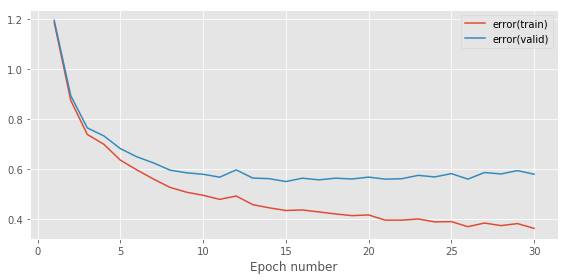

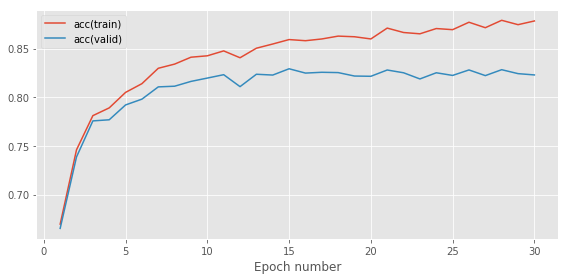

In [4]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ELULayer, MaxPoolingLayer, ConvolutionalLayer, ReshapeLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.3
num_epochs = 30
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    ReshapeLayer(output_shape=(1,28,28)),
    ConvolutionalLayer(num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5),
    ELULayer(),
#     MaxPoolingLayer(batch_size, num_input_channels=5,
#                  input_dim_1=24, input_dim_2=24,
#                  kernel_dim_1=2, kernel_dim_2=2),
#     ConvolutionalLayer(num_input_channels=5,
#         num_output_channels=10,
#         input_dim_1=12,
#         input_dim_2=12,
#         kernel_dim_1=5,
#         kernel_dim_2=5),
#     ELULayer(),
#     MaxPoolingLayer(batch_size, num_input_channels=10,
#                  input_dim_1=8, input_dim_2=8,
#                  kernel_dim_1=2, kernel_dim_2=2),
    ReshapeLayer(),

    AffineLayer(2880, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Train the network
fb1 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "CNN_1_Layer")

In [3]:
# # Store data
# import pickle
# outputFile = 'CNN_1_Layer.data'
# fw = open(outputFile, 'wb')
# pickle.dump(fb1, fw)
# fw.close()

# Load data
import pickle
inputFile = 'CNN_1_Layer.data'
fd = open(inputFile, 'rb')
fb1 = pickle.load(fd)

# CNN with 2 convolution layers, 2 maxpooling layers and a full-connected layer

HBox(children=(IntProgress(value=0, max=50), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 1: 679.4s to complete
    error(train)=6.10e-01, acc(train)=8.05e-01, error(valid)=6.12e-01, acc(valid)=8.02e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 2: 679.2s to complete
    error(train)=5.50e-01, acc(train)=8.23e-01, error(valid)=5.67e-01, acc(valid)=8.20e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 3: 724.9s to complete
    error(train)=5.01e-01, acc(train)=8.34e-01, error(valid)=5.22e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 4: 758.9s to complete
    error(train)=4.71e-01, acc(train)=8.42e-01, error(valid)=5.04e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 5: 744.7s to complete
    error(train)=4.84e-01, acc(train)=8.35e-01, error(valid)=5.24e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 6: 749.4s to complete
    error(train)=4.57e-01, acc(train)=8.46e-01, error(valid)=4.97e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 7: 701.6s to complete
    error(train)=4.52e-01, acc(train)=8.46e-01, error(valid)=5.01e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 8: 680.5s to complete
    error(train)=4.53e-01, acc(train)=8.45e-01, error(valid)=4.94e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 9: 677.3s to complete
    error(train)=4.38e-01, acc(train)=8.51e-01, error(valid)=4.92e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 10: 677.3s to complete
    error(train)=4.33e-01, acc(train)=8.54e-01, error(valid)=4.86e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 11: 678.6s to complete
    error(train)=4.41e-01, acc(train)=8.47e-01, error(valid)=4.94e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 12: 674.7s to complete
    error(train)=4.30e-01, acc(train)=8.50e-01, error(valid)=4.86e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 13: 668.7s to complete
    error(train)=4.25e-01, acc(train)=8.55e-01, error(valid)=4.81e-01, acc(valid)=8.40e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 14: 668.5s to complete
    error(train)=4.37e-01, acc(train)=8.51e-01, error(valid)=4.98e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 15: 668.2s to complete
    error(train)=4.28e-01, acc(train)=8.54e-01, error(valid)=4.87e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 16: 668.9s to complete
    error(train)=4.43e-01, acc(train)=8.47e-01, error(valid)=5.00e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 17: 670.0s to complete
    error(train)=4.34e-01, acc(train)=8.53e-01, error(valid)=5.04e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 18: 673.6s to complete
    error(train)=4.27e-01, acc(train)=8.51e-01, error(valid)=4.90e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 19: 669.7s to complete
    error(train)=4.36e-01, acc(train)=8.49e-01, error(valid)=5.03e-01, acc(valid)=8.34e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 20: 669.7s to complete
    error(train)=4.18e-01, acc(train)=8.57e-01, error(valid)=4.86e-01, acc(valid)=8.43e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 21: 668.4s to complete
    error(train)=4.26e-01, acc(train)=8.54e-01, error(valid)=4.94e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 22: 669.9s to complete
    error(train)=4.07e-01, acc(train)=8.61e-01, error(valid)=4.76e-01, acc(valid)=8.45e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 23: 670.5s to complete
    error(train)=4.29e-01, acc(train)=8.53e-01, error(valid)=5.01e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 24: 671.1s to complete
    error(train)=4.16e-01, acc(train)=8.56e-01, error(valid)=4.87e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 25: 671.0s to complete
    error(train)=4.17e-01, acc(train)=8.55e-01, error(valid)=4.82e-01, acc(valid)=8.44e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 26: 668.8s to complete
    error(train)=4.17e-01, acc(train)=8.54e-01, error(valid)=4.85e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 27: 669.2s to complete
    error(train)=4.14e-01, acc(train)=8.57e-01, error(valid)=4.86e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 28: 669.8s to complete
    error(train)=4.28e-01, acc(train)=8.52e-01, error(valid)=5.02e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 29: 669.3s to complete
    error(train)=4.35e-01, acc(train)=8.45e-01, error(valid)=5.04e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 30: 670.8s to complete
    error(train)=4.16e-01, acc(train)=8.57e-01, error(valid)=4.88e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 31: 670.8s to complete
    error(train)=4.19e-01, acc(train)=8.51e-01, error(valid)=4.88e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 32: 669.1s to complete
    error(train)=4.15e-01, acc(train)=8.54e-01, error(valid)=4.87e-01, acc(valid)=8.37e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 33: 669.1s to complete
    error(train)=4.25e-01, acc(train)=8.56e-01, error(valid)=4.99e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 34: 669.7s to complete
    error(train)=4.09e-01, acc(train)=8.59e-01, error(valid)=4.83e-01, acc(valid)=8.46e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 35: 669.8s to complete
    error(train)=4.23e-01, acc(train)=8.53e-01, error(valid)=4.99e-01, acc(valid)=8.41e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 36: 668.3s to complete
    error(train)=4.07e-01, acc(train)=8.58e-01, error(valid)=4.82e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 37: 670.7s to complete
    error(train)=4.10e-01, acc(train)=8.56e-01, error(valid)=4.86e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 38: 668.3s to complete
    error(train)=4.17e-01, acc(train)=8.54e-01, error(valid)=4.87e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 39: 686.4s to complete
    error(train)=4.07e-01, acc(train)=8.60e-01, error(valid)=4.84e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 40: 670.6s to complete
    error(train)=4.09e-01, acc(train)=8.58e-01, error(valid)=4.84e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 41: 669.4s to complete
    error(train)=4.10e-01, acc(train)=8.58e-01, error(valid)=4.89e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 42: 669.3s to complete
    error(train)=4.17e-01, acc(train)=8.61e-01, error(valid)=5.00e-01, acc(valid)=8.47e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 43: 672.8s to complete
    error(train)=4.27e-01, acc(train)=8.49e-01, error(valid)=5.06e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 44: 670.0s to complete
    error(train)=4.42e-01, acc(train)=8.50e-01, error(valid)=5.28e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 45: 670.5s to complete
    error(train)=4.13e-01, acc(train)=8.57e-01, error(valid)=4.86e-01, acc(valid)=8.38e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 46: 670.7s to complete
    error(train)=4.15e-01, acc(train)=8.56e-01, error(valid)=4.92e-01, acc(valid)=8.42e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 47: 671.3s to complete
    error(train)=4.05e-01, acc(train)=8.59e-01, error(valid)=4.88e-01, acc(valid)=8.39e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 48: 670.8s to complete
    error(train)=4.18e-01, acc(train)=8.51e-01, error(valid)=4.99e-01, acc(valid)=8.32e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 49: 669.7s to complete
    error(train)=4.22e-01, acc(train)=8.49e-01, error(valid)=5.01e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 50: 669.0s to complete
    error(train)=4.13e-01, acc(train)=8.54e-01, error(valid)=4.97e-01, acc(valid)=8.35e-01


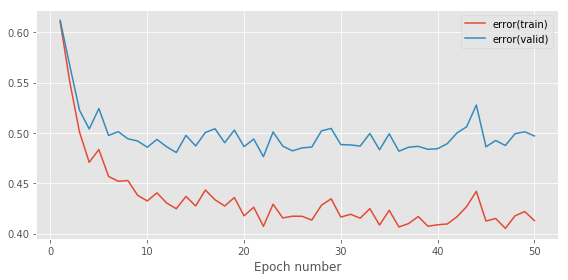

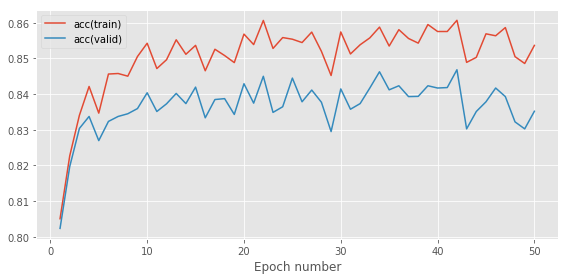

In [5]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ELULayer, MaxPoolingLayer, ConvolutionalLayer, ReshapeLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.5
num_epochs = 50
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    ReshapeLayer(output_shape=(1,28,28)),
    ConvolutionalLayer(num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5),
    ELULayer(),
    MaxPoolingLayer(batch_size, num_input_channels=5,
                 input_dim_1=24, input_dim_2=24,
                 kernel_dim_1=2, kernel_dim_2=2),
    ConvolutionalLayer(num_input_channels=5,
        num_output_channels=10,
        input_dim_1=12,
        input_dim_2=12,
        kernel_dim_1=5,
        kernel_dim_2=5),
    ELULayer(),
    MaxPoolingLayer(batch_size, num_input_channels=10,
                 input_dim_1=8, input_dim_2=8,
                 kernel_dim_1=2, kernel_dim_2=2),
    ReshapeLayer(),

    AffineLayer(160, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = AdamLearningRule(learning_rate=learning_rate)

# Train the network
fb2 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "CNN_2_Layers")

In [7]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 10102016 
rng = np.random.RandomState(seed)
batch_size = 50
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

['inputs', 'targets']
['inputs', 'targets']


In [ ]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ELULayer, MaxPoolingLayer, ConvolutionalLayer, ReshapeLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, GradientDescentLearningRule
from mlp.optimisers import Optimiser

#setup hyperparameters
learning_rate = 0.1
num_epochs = 50
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100


weights_init = GlorotUniformInit(rng=rng)
biases_init = ConstantInit(0.)
model = MultipleLayerModel([
    ReshapeLayer(output_shape=(1,28,28)),
    ConvolutionalLayer(num_input_channels=1,
        num_output_channels=5,
        input_dim_1=28,
        input_dim_2=28,
        kernel_dim_1=5,
        kernel_dim_2=5),
    ELULayer(),
    MaxPoolingLayer(batch_size, num_input_channels=5,
                 input_dim_1=24, input_dim_2=24,
                 kernel_dim_1=2, kernel_dim_2=2),
    ConvolutionalLayer(num_input_channels=5,
        num_output_channels=10,
        input_dim_1=12,
        input_dim_2=12,
        kernel_dim_1=5,
        kernel_dim_2=5),
    ELULayer(),
    MaxPoolingLayer(batch_size, num_input_channels=10,
                 input_dim_1=8, input_dim_2=8,
                 kernel_dim_1=2, kernel_dim_2=2),
    ReshapeLayer(),
    AffineLayer(160, output_dim, weights_init, biases_init)
])

error = CrossEntropySoftmaxError()
# Use a basic gradient descent learning rule
learning_rule = GradientDescentLearningRule(learning_rate=learning_rate)

# Train the network
fb4 = train_model_and_plot_stats(
    model, error, learning_rule, train_data, valid_data, num_epochs, stats_interval, notebook=True, picName = "CNN_GSD_")

# Store data
import pickle
outputFile = 'CNN_2_Layer_GSD.data'
fw = open(outputFile, 'wb')
pickle.dump(fb1, fw)
fw.close()

HBox(children=(IntProgress(value=0, max=50), HTML(value=u'')))

HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 1: 669.6s to complete
    error(train)=5.83e-01, acc(train)=8.10e-01, error(valid)=5.84e-01, acc(valid)=8.10e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 2: 673.9s to complete
    error(train)=5.01e-01, acc(train)=8.32e-01, error(valid)=5.15e-01, acc(valid)=8.29e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 3: 676.0s to complete
    error(train)=4.74e-01, acc(train)=8.42e-01, error(valid)=5.02e-01, acc(valid)=8.33e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 4: 686.5s to complete
    error(train)=5.53e-01, acc(train)=8.23e-01, error(valid)=5.90e-01, acc(valid)=8.13e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 5: 677.6s to complete
    error(train)=4.63e-01, acc(train)=8.42e-01, error(valid)=5.02e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 6: 673.9s to complete
    error(train)=4.82e-01, acc(train)=8.37e-01, error(valid)=5.26e-01, acc(valid)=8.27e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 7: 673.3s to complete
    error(train)=4.67e-01, acc(train)=8.40e-01, error(valid)=5.13e-01, acc(valid)=8.30e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 8: 672.6s to complete
    error(train)=4.52e-01, acc(train)=8.45e-01, error(valid)=4.96e-01, acc(valid)=8.36e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))

Epoch 9: 680.4s to complete
    error(train)=4.63e-01, acc(train)=8.46e-01, error(valid)=5.08e-01, acc(valid)=8.35e-01


HBox(children=(IntProgress(value=0, max=2000), HTML(value=u'')))